Q1. Mathematical Formula for a Linear SVM
A linear SVM finds the optimal hyperplane given by:

𝑤
⋅
𝑥
+
𝑏
=
0
w⋅x+b=0
where 
𝑤
w is the weight vector and 
𝑏
b is the bias.

Q2. Objective Function of a Linear SVM
The objective is to maximize the margin while minimizing classification errors:

min
⁡
1
2
∣
∣
𝑤
∣
∣
2
subject to
𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
,
∀
𝑖
min 
2
1
​
 ∣∣w∣∣ 
2
 subject toy 
i
​
 (w⋅x 
i
​
 +b)≥1,∀i
For soft margin SVM, a slack variable 
𝜉
𝑖
ξ 
i
​
  is introduced:

min
⁡
1
2
∣
∣
𝑤
∣
∣
2
+
𝐶
∑
𝜉
𝑖
min 
2
1
​
 ∣∣w∣∣ 
2
 +C∑ξ 
i
​
 
subject to 
𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
−
𝜉
𝑖
y 
i
​
 (w⋅x 
i
​
 +b)≥1−ξ 
i
​
 , 
𝜉
𝑖
≥
0
ξ 
i
​
 ≥0.

Q3. Kernel Trick in SVM
The kernel trick transforms data into a higher-dimensional space to make it linearly separable. Instead of computing dot products in high-dimensional space, it uses a kernel function 
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
K(x 
i
​
 ,x 
j
​
 ) to compute similarity.

Common kernels:

Linear: 
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
𝑥
𝑖
⋅
𝑥
𝑗
K(x 
i
​
 ,x 
j
​
 )=x 
i
​
 ⋅x 
j
​
 
Polynomial: 
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
(
𝑥
𝑖
⋅
𝑥
𝑗
+
𝑐
)
𝑑
K(x 
i
​
 ,x 
j
​
 )=(x 
i
​
 ⋅x 
j
​
 +c) 
d
 
RBF (Gaussian): 
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
exp
⁡
(
−
∣
∣
𝑥
𝑖
−
𝑥
𝑗
∣
∣
2
2
𝜎
2
)
K(x 
i
​
 ,x 
j
​
 )=exp(− 
2σ 
2
 
∣∣x 
i
​
 −x 
j
​
 ∣∣ 
2
 
)

Q4. Role of Support Vectors in SVM (Example)
Support vectors are the data points closest to the decision boundary, defining the margin.

Example:
Consider two classes, red and blue, in 2D space. The optimal hyperplane is drawn to separate them, and the points closest to this hyperplane are the support vectors. These points determine the position and orientation of the decision boundary.

Q5

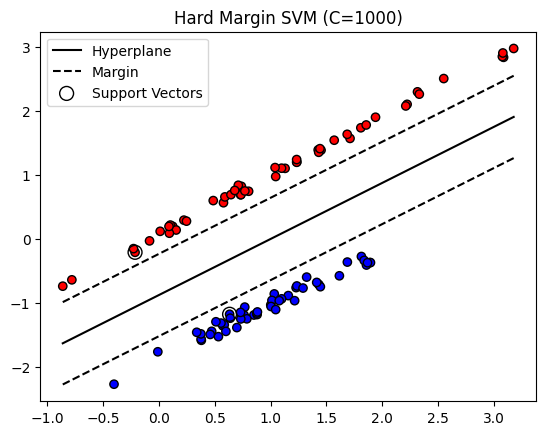

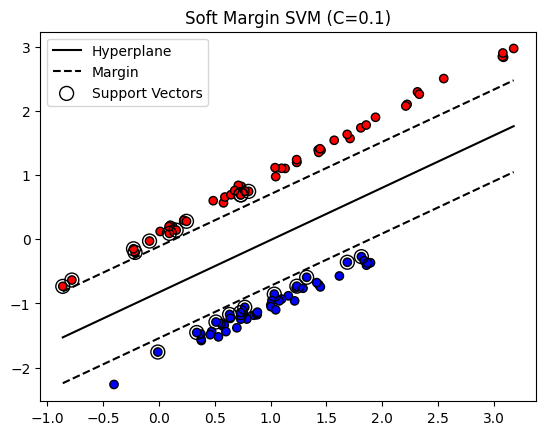

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = 2*y - 1  # Convert labels to {-1, 1}

# Train SVM for hard and soft margin
svm_hard = SVC(kernel='linear', C=1000)  # Large C for hard margin
svm_soft = SVC(kernel='linear', C=0.1)   # Small C for soft margin
svm_hard.fit(X, y)
svm_soft.fit(X, y)

# Function to plot decision boundary
def plot_svm(svm, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    
    # Plot hyperplane
    w = svm.coef_[0]
    b = svm.intercept_[0]
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    x_plot = np.linspace(x_min, x_max, 100)
    y_plot = -(w[0] * x_plot + b) / w[1]
    plt.plot(x_plot, y_plot, 'k-', label='Hyperplane')

    # Marginal planes
    margin = 1 / np.linalg.norm(w)
    y_margin1 = y_plot + margin
    y_margin2 = y_plot - margin
    plt.plot(x_plot, y_margin1, 'k--', label='Margin')
    plt.plot(x_plot, y_margin2, 'k--')

    # Support vectors
    sv = svm.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(title)
    plt.legend()
    plt.show()

# Plot Hard and Soft Margin SVM
plot_svm(svm_hard, X, y, "Hard Margin SVM (C=1000)")
plot_svm(svm_soft, X, y, "Soft Margin SVM (C=0.1)")


Q6

Accuracy: 1.00


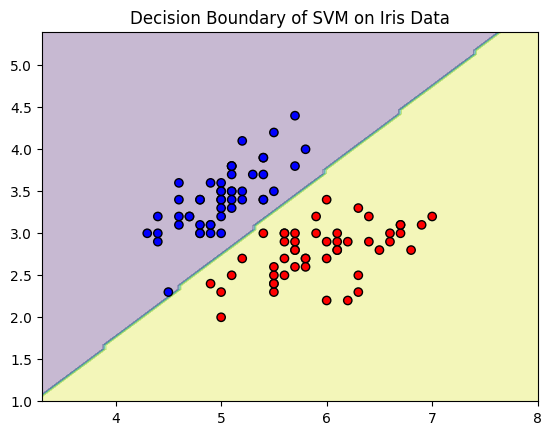

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only first two features for visualization
y = iris.target

# Convert to binary classification (only two classes)
X, y = X[y != 2], y[y != 2]  # Removing third class
y = 2 * y - 1  # Convert labels to {-1, 1}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predict labels
y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot decision boundary
def plot_decision_boundary(svm, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title("Decision Boundary of SVM on Iris Data")
    plt.show()

plot_decision_boundary(svm, X, y)
